# Caracterização meteorológica da área de estudo

Aluna: Bruna Boscato Toscani

Nesta atividade caracterizaremos a meteorologia da área de estudo. Avaliaremos os seguintes pontos:

1. Meteorologia de superfície
2. Meteorologia upperair ou sondagem/perfil da atmosfera
3. Superfície - Alberto, Razão de Bowen e Rugosidade

## Meteorologia de superfície
Analizaremos os dados de metar (estação meteorológica em aeroportos). Os dados serão coletados na plataforma (LINK)
Faça seu login e colete o dado para o período de 01/01/2023 a 01/01/2024
Os dados estarão na pasta de inputs/meteoSuperficie com a nomeclatura metar.csv

In [1]:
# Selecionar arquivo para análise 
import os

# Pegando o caminho do diretório que estou
rootPath = os.getcwd()
print(rootPath)

# Definindo o diretório ...
metSuperficiePath = rootPath + '\\inputs\\meteoSuperficie'

# Listando ...
...

C:\Users\bruna\OneDrive\Documentos\UFSC\Controle de Poluicao Atmosferica\ENS5173_20241


In [3]:
# Abrindo os arquivos metar
import pandas as pd

# Abrindo cada arquico dentro da pasta e acumulando em uma lista chamada de metSuperficie
metSuperficie=[]
for file in files:
    metSuperficie.append(pd.read_csv(metSuperficiePath + '\\' + file))

# Convertendo metSuperficie para o DataFrame
metSuperficie = pd.concat(metSuperficie)

print(metSuperficie)
print(type(metSuperficie))

NameError: name 'files' is not defined

In [6]:
# Criar uma coluna com Datetime dos dados
# Criar uma coluna de data e hora combinando as colunas separadas
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day', 'hour']])
print(metSuperficie['datetime'])

# Definindo a coluna do datetime como índice da matriz
...

TypeError: list indices must be integers or slices, not list

TypeError: list indices must be integers or slices, not str

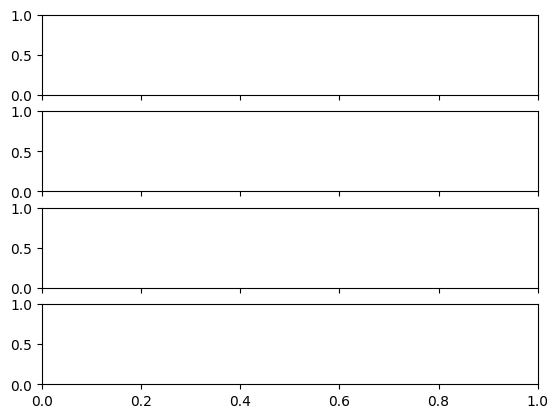

In [12]:
# Analisando os dados através de figuras
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, sharex = True)
ax[0].plot(metSuperficie['datetime'],metSuperficie['temp'], color = 'red') 
ax[1].plot(metSuperficie['datetime'],metSuperficie['p'], color = 'orange') 
ax[1].plot(metSuperficie['datetime'],metSuperficie['relh'], color = 'yellow') 
ax[3].plot(metSuperficie['datetime'],metSuperficie['cco'], color = 'gray') 
ax[3].tick_params(axis='x', rotation=45)

In [ ]:
# Estastísticas dos dados 
media_mensal = 